# EDA

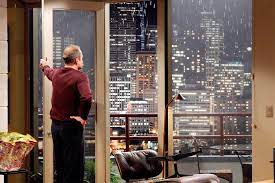

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv("data/eda.csv")  # 파일명에 따라 'eda.csv' 또는 'king_county_cleaned.csv'일 수도 있어요
df.head()

,id,house_id,zipcode,bedrooms,bathrooms,floors,sqft_living,sqft_lot,yr_built,grade,sold_date,price
0,1,7129300520,98178,3.000,1.000,1.000,1180.000,5650.000,1955,7,2014-10-13,221900.000
1,2,6414100192,98125,3.000,2.250,2.000,2570.000,7242.000,1951,7,2014-12-09,538000.000
2,3,5631500400,98028,2.000,1.000,1.000,770.000,10000.000,1933,6,2015-02-25,180000.000
3,4,2487200875,98136,4.000,3.000,1.000,1960.000,5000.000,1965,7,2014-12-09,604000.000
4,5,1954400510,98074,3.000,2.000,1.000,1680.000,8080.000,1987,8,2015-02-18,510000.000


In [4]:


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   house_id     21597 non-null  int64  
 2   zipcode      21597 non-null  int64  
 3   bedrooms     21597 non-null  float64
 4   bathrooms    21597 non-null  float64
 5   floors       21597 non-null  float64
 6   sqft_living  21597 non-null  float64
 7   sqft_lot     21597 non-null  float64
 8   yr_built     21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  sold_date    21597 non-null  object 
 11  price        21597 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 2.0+ MB


In [5]:
df.describe()
# std 평균을 중심으로 값이 클수록 평균으로부터 더 멀리 퍼져 있다는 뜻이에요.
# sold date는 string 이여서 빠짐. 

,id,house_id,zipcode,bedrooms,bathrooms,floors,sqft_living,sqft_lot,yr_built,grade,price
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,10799.000,4580474287.771,98077.952,3.373,2.116,1.494,2080.322,15099.409,1971.000,7.658,540296.574
std,6234.661,2876735715.748,53.513,0.926,0.769,0.540,918.106,41412.637,29.375,1.173,367368.140
min,1.000,1000102.000,98001.000,1.000,0.500,1.000,370.000,520.000,1900.000,3.000,78000.000
25%,5400.000,2123049175.000,98033.000,3.000,1.750,1.000,1430.000,5040.000,1951.000,7.000,322000.000
50%,10799.000,3904930410.000,98065.000,3.000,2.250,1.500,1910.000,7618.000,1975.000,7.000,450000.000
75%,16198.000,7308900490.000,98118.000,4.000,2.500,2.000,2550.000,10685.000,1997.000,8.000,645000.000
max,21597.000,9900000190.000,98199.000,33.000,8.000,3.500,13540.000,1651359.000,2015.000,13.000,7700000.000


In [6]:
df.isna().sum()

id             0
house_id       0
zipcode        0
bedrooms       0
bathrooms      0
floors         0
sqft_living    0
sqft_lot       0
yr_built       0
grade          0
sold_date      0
price          0
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

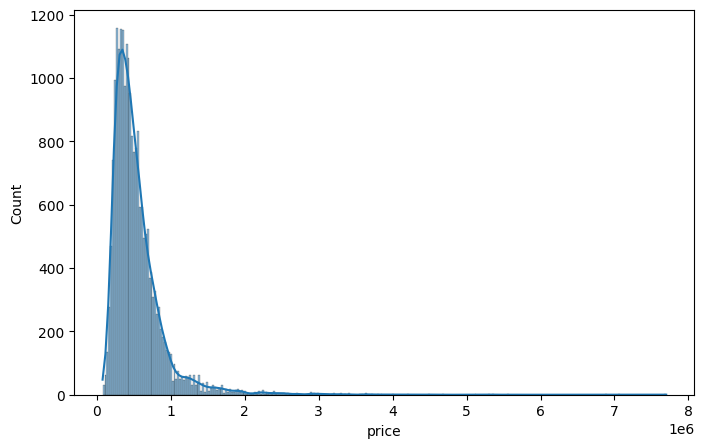

In [7]:
# 가격 분포
sns.histplot(df['price'], kde=True)

<Axes: xlabel='sqft_living', ylabel='price'>

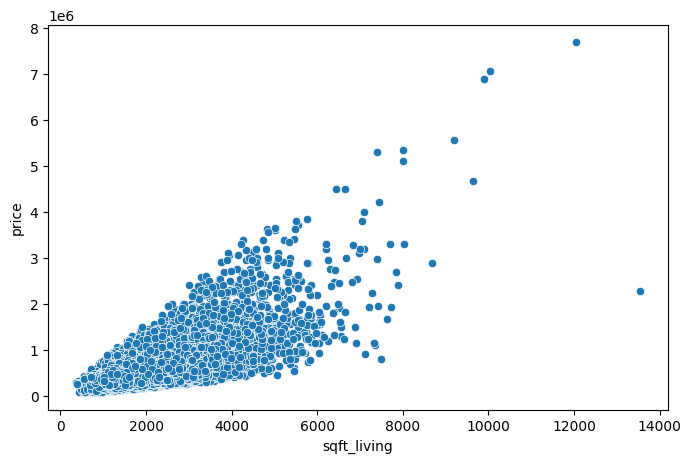

In [8]:
# 평수 vs 가격
sns.scatterplot(x='sqft_living', y='price', data=df)


```
✅ 1. matplotlib의 자동 숫자 축약 표기 규칙
matplotlib은 Y축 숫자가 너무 크면 자동으로 단위를 축약해서 표현합니다.
축약된 단위는 지수 표기법 (scientific notation) 으로 표시돼요:

표기	실제 의미
1e3	천 단위 (1,000)
1e6	백만 단위 (1,000,000)
1e7	천만 단위 (10,000,000)

그래서 Y축에 1e6이 뜬다면,
Y축 숫자들은 실제로 백만 단위로 표현되고 있다는 뜻입니다.

✅ 2. 숫자 크기로 직접 확인하기
python
복사
편집
zipcode_price.max()

그냥 모르겠으면 단위들 곱하면됨. 0.5 X 1,000,000


```

In [9]:
df.isna().sum()

id             0
house_id       0
zipcode        0
bedrooms       0
bathrooms      0
floors         0
sqft_living    0
sqft_lot       0
yr_built       0
grade          0
sold_date      0
price          0
dtype: int64

In [10]:
df["price_per_sqft"] = round(df["price"] / df["sqft_living"], 2)

In [11]:
df

,id,house_id,zipcode,bedrooms,bathrooms,floors,sqft_living,sqft_lot,yr_built,grade,sold_date,price,price_per_sqft
0,1,7129300520,98178,3.000,1.000,1.000,1180.000,5650.000,1955,7,2014-10-13,221900.000,188.050
1,2,6414100192,98125,3.000,2.250,2.000,2570.000,7242.000,1951,7,2014-12-09,538000.000,209.340
2,3,5631500400,98028,2.000,1.000,1.000,770.000,10000.000,1933,6,2015-02-25,180000.000,233.770
3,4,2487200875,98136,4.000,3.000,1.000,1960.000,5000.000,1965,7,2014-12-09,604000.000,308.160
4,5,1954400510,98074,3.000,2.000,1.000,1680.000,8080.000,1987,8,2015-02-18,510000.000,303.570
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21593,263000018,98103,3.000,2.500,3.000,1530.000,1131.000,2009,8,2014-05-21,360000.000,235.290
21593,21594,6600060120,98146,4.000,2.500,2.000,2310.000,5813.000,2014,8,2015-02-23,400000.000,173.160
21594,21595,1523300141,98144,2.000,0.750,2.000,1020.000,1350.000,2009,7,2014-06-23,402101.000,394.220
21595,21596,291310100,98027,3.000,2.500,2.000,1600.000,2388.000,2004,8,2015-01-16,400000.000,250.000


## zipcode로 location_type 컬럼 만들기 ##

In [12]:
def classify_location(zipcode):
    if zipcode in [98039, 98004, 98040]:  # Medina, Bellevue, Mercer Island
        return "Premium Spot"
    elif zipcode in [98101, 98102, 98103, 98105, 98109, 98115, 98122]:  # Seattle core
        return "City"
    elif zipcode in [98125, 98133, 98146, 98117]:  # North Seattle / West Seattle
        return "Close to Suburb"
    elif zipcode in [98005, 98011, 98052, 98034, 98033, 98074, 98075]:  # Bellevue/Kirkland/Redmond
        return "Suburb Close to City"
    elif zipcode in [98023, 98031, 98042, 98058, 98059, 98092, 98030, 98002]:  # Kent, Auburn, Federal Way
        return "Suburb"
    elif zipcode in [98070, 98014, 98019, 98024, 98045, 98051, 98022]:  # Vashon, Snoqualmie
        return "Rural"
    else:
        return "Other"


df["location_type"] = df["zipcode"].apply(zip_to_region)

NameError: name 'zip_to_region' is not defined

In [ ]:
df

## 실제 도심 가격이 비싼지 체크 -> 맞음 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="location_type", y="price_per_sqft", palette="viridis")

plt.title("Price per Sqft by Location Type", fontsize=14)
plt.xlabel("Location Type", fontsize=12)
plt.ylabel("Price per Sqft ($)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x="location_type", y="grade", data=df, palette="viridis")

plt.title("Distribution of Housing Grade by Location Type", fontsize=14)
plt.xlabel("Location Type", fontsize=12)
plt.ylabel("Housing Grade", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


내가 위와 아래에서 알고싶은건 grade가 대체 뭔지? city/suburb/고급지역에 있는건지? 아니면 비싼저택을 의미하는건지? 

## 등급은 주택의 가격에 비례한다!!! ##
"주택 등급(grade)은 가격을 잘 설명하는 유의미한 변수이다."
특히 grade가 높아질수록 주택 가격도 뚜렷하게 상승한다.

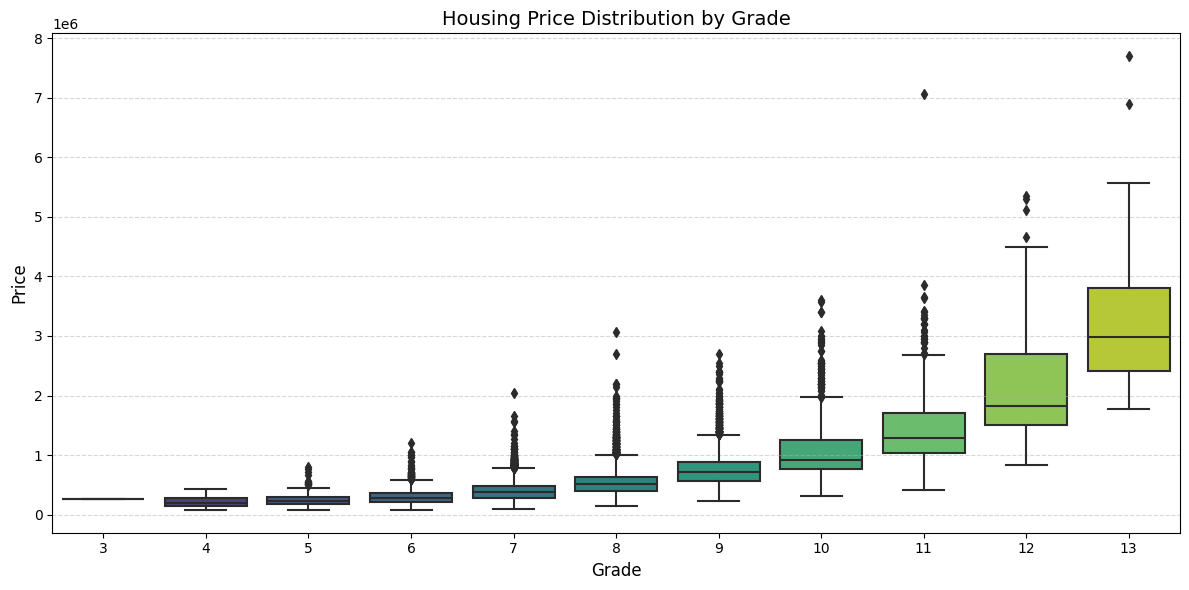

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x="grade", y="price", data=df, palette="viridis")

plt.title("Housing Price Distribution by Grade", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## 고객 : 니콜라 ##

```
🔍 Nicole Johnson과의 연관성
조건	해석	만족 여부
중심지	Seattle, Bellevue, Redmond 등은 중심지 성격	✅
활기찬 동네	젊은층, 커뮤니티 활성화된 지역 다수 포함	✅
중간 가격대	$300k~$600k 선도 다수 존재	✅
타이밍	sold_date 포함 → 최근 거래 분석 가능	✅
```

## 1. zipcode 를 범주화하고, 그걸 기준으로 -> location type 만들고 -> 그걸 그 지역의 평균 평당 금액으로 표기하기 ##
## 1.1 livly, central 지역  ##

In [14]:
def classify_location(zipcode):
    zipcode = int(zipcode)  # 혹시 문자열일 경우를 대비

    if 98039 <= zipcode <= 98040:
        return "Premium Spot"  # Medina, Mercer Island 등
    elif 98101 <= zipcode <= 98122:
        return "City Core"     # Seattle 도심
    elif 98123 <= zipcode <= 98199:
        return "City"          # North/West Seattle 등
    elif 98001 <= zipcode <= 98059:
        return "Suburb Close to City"  # Renton, Kent, Federal Way 등
    elif 98060 <= zipcode <= 98099:
        return "Suburb"        # Bellevue 외곽, Snoqualmie 등
    elif 98000 <= zipcode <= 98005:
        return "Premium Spot"  # Bellevue 중심 일부
    else:
        return "Other"

# 적용
df["location_type"] = df["zipcode"].apply(classify_location)


In [16]:
df

,id,house_id,zipcode,bedrooms,bathrooms,floors,sqft_living,sqft_lot,yr_built,grade,sold_date,price,price_per_sqft,location_type
0,1,7129300520,98178,3.000,1.000,1.000,1180.000,5650.000,1955,7,2014-10-13,221900.000,188.050,City
1,2,6414100192,98125,3.000,2.250,2.000,2570.000,7242.000,1951,7,2014-12-09,538000.000,209.340,City
2,3,5631500400,98028,2.000,1.000,1.000,770.000,10000.000,1933,6,2015-02-25,180000.000,233.770,Suburb Close to City
3,4,2487200875,98136,4.000,3.000,1.000,1960.000,5000.000,1965,7,2014-12-09,604000.000,308.160,City
4,5,1954400510,98074,3.000,2.000,1.000,1680.000,8080.000,1987,8,2015-02-18,510000.000,303.570,Suburb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21593,263000018,98103,3.000,2.500,3.000,1530.000,1131.000,2009,8,2014-05-21,360000.000,235.290,City Core
21593,21594,6600060120,98146,4.000,2.500,2.000,2310.000,5813.000,2014,8,2015-02-23,400000.000,173.160,City
21594,21595,1523300141,98144,2.000,0.750,2.000,1020.000,1350.000,2009,7,2014-06-23,402101.000,394.220,City
21595,21596,291310100,98027,3.000,2.500,2.000,1600.000,2388.000,2004,8,2015-01-16,400000.000,250.000,Suburb Close to City


In [20]:
df[df["location_type"] == "Other"].shape[0]

0

## 2. City Core 기준 적정 편균가 구하기 1) grouby ##

In [38]:
location_summary = df.groupby("location_type")[["price", "price_per_sqft"]].mean().round(2).sort_values("price")

location_summary

,price,price_per_sqft
location_type,,
City,452534.450,259.160
Suburb Close to City,508287.300,229.420
Suburb,593570.720,235.360
City Core,615439.990,349.200
Premium Spot,1340419.780,414.700


## 2. City Core 기준 적정 편균가 구하기 2) describe ##

In [44]:
# City Core 데이터만 필터링
city_core_df = df[df["location_type"] == "City Core"]

# City Core의 가격 통계 요약
city_core_df["price"].describe().apply(lambda x: round(x, 2))

count      4547.000
mean     615439.990
std      364001.410
min       90000.000
25%      411607.500
50%      540000.000
75%      707700.000
max     7700000.000
Name: price, dtype: float64

```
✅ 요약 비교
항목	방식	설명
위 Table	groupby().mean()	각 그룹(지역)의 평균을 한 줄로 요약 (샘플 수 다름)
아래 describe()	전체 개별 행 기준	개별 집 하나하나의 값을 기반으로 한 정확한 통계
```


In [45]:
q1 = city_core_df["price"].quantile(0.25)
q3 = city_core_df["price"].quantile(0.75)

print(f"City Core 중간 가격대 범위: ${int(q1):,} ~ ${int(q3):,}")

City Core 중간 가격대 범위: $411,607 ~ $707,700


## 위 city core지역 -> 중간가격대 -> 실면적 큰걸로 재정리 ##

In [ ]:
mid_price_df = city_core_df[
    (city_core_df["price"] >= q1) &
    (city_core_df["price"] <= q3)
].copy()

In [70]:
# 2. 면적 기준으로 정렬
sorted_df = mid_price_df.sort_values("sqft_living", ascending=False)

# 3. 결과 확인
sorted_df[["location_type","zipcode", "sqft_living", "price", "price_per_sqft", "grade", "sold_date"]].head(10)

,location_type,zipcode,sqft_living,price,price_per_sqft,grade,sold_date
21356,City Core,98119,4460.000,490000.000,109.870,10,2014-05-20
13765,City Core,98118,4340.000,537500.000,123.850,8,2015-01-26
13107,City Core,98106,4340.000,419000.000,96.540,7,2014-09-10
2364,City Core,98118,4250.000,665000.000,156.470,7,2014-06-11
16917,City Core,98112,3990.000,610000.000,152.880,8,2014-06-02
3997,City Core,98106,3870.000,645000.000,166.670,9,2015-04-27
4092,City Core,98103,3830.000,599999.000,156.660,7,2014-05-07
16764,City Core,98108,3820.000,550000.000,143.980,8,2014-07-20
20836,City Core,98103,3730.000,595000.000,159.520,9,2014-07-09
4231,City Core,98102,3680.000,700000.000,190.220,7,2015-01-06


## 3. 니콜라이가 살려는 2014 2015년 지역 판매 트랜드보기, 이거 보면 실제로 얼마에 거래됬고 , 가격이 어떻게 움지였는지, 즉 나중에 니콜라이가 집을 살때 2015년 2월처럼, 봄에 사면 좋겠다.. 라는 생각을 할수 있다. ##

In [61]:
# 1. 먼저 전체 데이터에서 날짜 타입으로 변환
df["sold_date"] = pd.to_datetime(df["sold_date"])

# 2. City Core 필터링 (날짜 타입 포함됨)
city_core_df = df[df["location_type"] == "City Core"].copy()

# 3. 최신 날짜로부터 1년 전 계산
from datetime import timedelta

latest_date = city_core_df["sold_date"].max()
one_year_ago = latest_date - timedelta(days=365)

# 4. 최근 1년간 거래 데이터만 추출
recent_df = city_core_df[city_core_df["sold_date"] >= one_year_ago].copy()


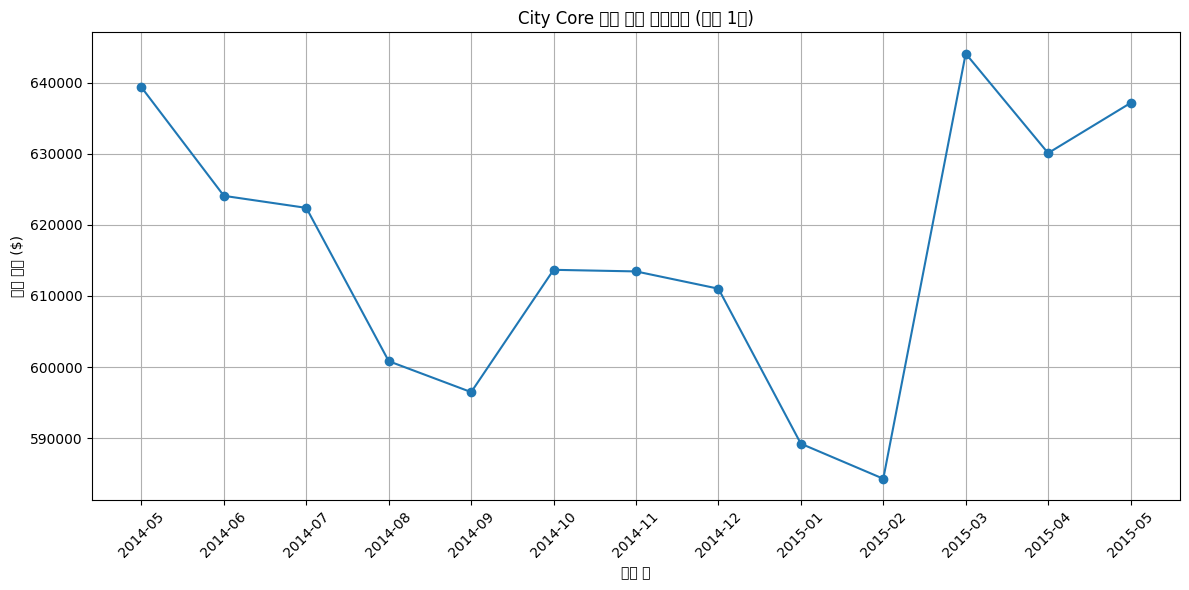

In [62]:
recent_df["sold_month"] = recent_df["sold_date"].dt.to_period("M").astype(str)

monthly_avg = recent_df.groupby("sold_month")["price"].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_avg["sold_month"], monthly_avg["price"], marker='o')
plt.title("City Core 월별 평균 거래가격 (최근 1년)")
plt.xlabel("판매 월")
plt.ylabel("평균 가격 ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2015년 1, 2월이 가장 좋았음. 이걸 바탕으로 이제 expectation, plotation을 해봐야할것 같음. 

```
✅ sold_date란?
그 집이 실제로 팔린 날짜, 즉 거래가 완료된 날짜를 의미해.
즉, 다른 사람이 이미 그 집을 사버렸다는 뜻이 맞아.

😕 그럼 "Nicole은 앞으로 집을 살 사람인데, 왜 sold_date가 중요하지?"
🎯 이유는 다음과 같아:
1. 시장 분석 (트렌드 파악용)
최근 6개월~1년간 팔린 집들의 sold_date를 보면:

가격이 오르고 있는지

거래가 활발한지

특정 계절에 많이 팔리는지
→ 이런 걸 알 수 있어 = “지금 사는 게 괜찮은 타이밍인가?” 판단에 도움

2. 현재 시장의 가격 기준은 팔린 집이 기준이 됨
Zillow, Redfin 같은 부동산 사이트들도 **최근에 팔린 집들(sold listings)**을 기준으로 시세 추정

Nicole이 비슷한 조건의 집을 찾고 싶다면 → **“비슷한 조건의 다른 집이 얼마에 팔렸나”**를 봐야 함

3. 집 자체가 지금 매물로 다시 나올 수도 있음
어떤 집은 투자 목적으로 짧은 기간 후 다시 매물로 나올 수 있음

과거 sold_date와 현재 매물 데이터를 비교해서 Nicole이 사야 할 집과 비교 대상을 만들 수 있음

✅ 요약: sold_date는 직접 살 수 있는 집은 아니지만...
항목	이유
❌ 직접 구매 대상은 아님	이미 팔린 집이니까
✅ 시장 분석에는 중요	거래량/가격/타이밍 판단 기준
✅ 유사 조건 비교 가능	“이런 집이 얼마에 팔렸는가?” → 예산 판단
✅ 타이밍 분석 지표	최근 몇 달간 오름세인지 판단 가능

📌 Nicole이 원하는 지역에서, 비슷한 조건의 집들이 최근에 어떤 가격에 팔렸는지 확인
→ 이게 곧 Nicole의 예상 구매가와 협상 전략에 큰 도움이 돼!
```

## 그냥 시계열로 분석해봄 ##


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


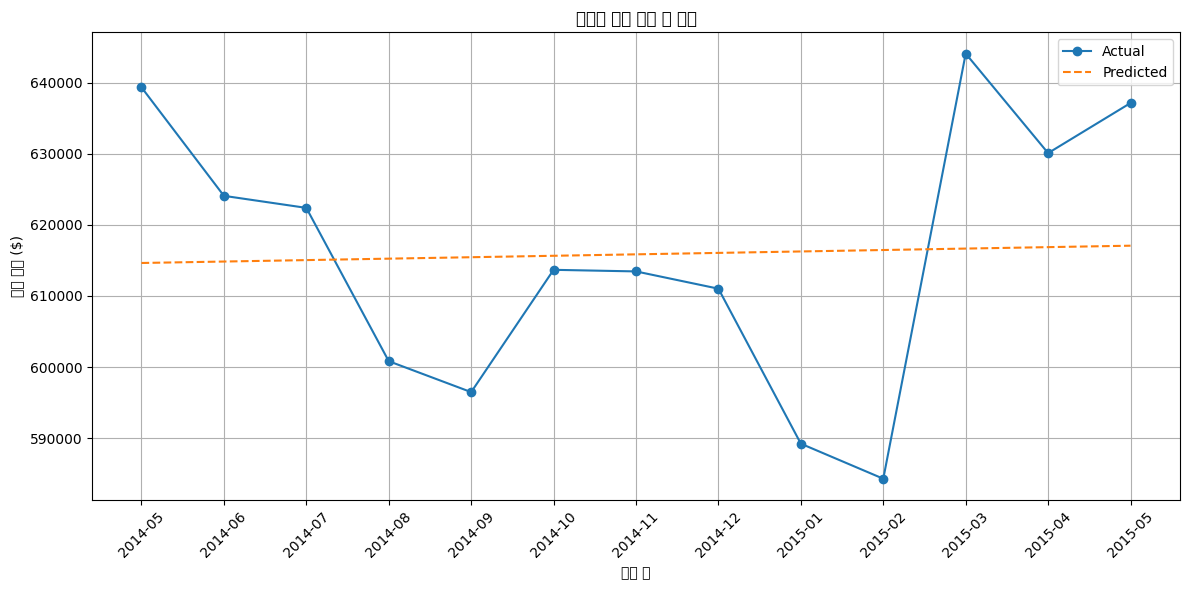

In [73]:
!pip install scikit-learn

from sklearn.linear_model import LinearRegression
import numpy as np

# 날짜를 숫자로 변환
monthly_avg["month_num"] = np.arange(len(monthly_avg))

# 선형 회귀
model = LinearRegression()
model.fit(monthly_avg[["month_num"]], monthly_avg["price"])

# 예측
monthly_avg["price_pred"] = model.predict(monthly_avg[["month_num"]])

# 시각화
plt.figure(figsize=(12,6))
plt.plot(monthly_avg["sold_month"], monthly_avg["price"], label="Actual", marker='o')
plt.plot(monthly_avg["sold_month"], monthly_avg["price_pred"], label="Predicted", linestyle="--")
plt.title("시계열 가격 추세 및 예측")
plt.xlabel("판매 월")
plt.ylabel("평균 가격 ($)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


```
🧠 Nicole에게 해줄 수 있는 말
“최근 시장을 보면, 가격은 2015년 초에 급락했다가 3월부터 급등했고,
현재는 예측선을 웃도는 높은 수준에서 유지되고 있어요.
단기적으로는 다시 가격이 오를 여지가 있으므로,
지금 구매를 고려하는 것은 나쁜 선택은 아니지만, 추가 상승 전에 빠르게 결정하는 것이 유리할 수 있습니다.”

💡 보너스 인사이트
시기	의미
1~2월	최저가 타이밍 (이때 샀으면 최고 이득)
3월 이후	회복기이자 상승 초입 → 타이밍 전략 중요
예측선보다 실제가 높음	수요 증가가 빠르며, 예측보다 더 강한 상승 압력 존재

```

## 데이터 클리닝 ##

In [133]:
df.dtypes

id                  int64
house_id            int64
zipcode             int64
bedrooms          float64
bathrooms         float64
floors            float64
sqft_living       float64
sqft_lot          float64
yr_built            int64
grade               int64
sold_date          object
price             float64
price_per_sqft    float64
location_type      object
dtype: object

In [134]:
df.columns

Index(['id', 'house_id', 'zipcode', 'bedrooms', 'bathrooms', 'floors',
       'sqft_living', 'sqft_lot', 'yr_built', 'grade', 'sold_date', 'price',
       'price_per_sqft', 'location_type'],
      dtype='object')

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   house_id        21597 non-null  int64  
 2   zipcode         21597 non-null  int64  
 3   bedrooms        21597 non-null  float64
 4   bathrooms       21597 non-null  float64
 5   floors          21597 non-null  float64
 6   sqft_living     21597 non-null  float64
 7   sqft_lot        21597 non-null  float64
 8   yr_built        21597 non-null  int64  
 9   grade           21597 non-null  int64  
 10  sold_date       21597 non-null  object 
 11  price           21597 non-null  float64
 12  price_per_sqft  21597 non-null  float64
 13  location_type   21597 non-null  object 
dtypes: float64(7), int64(5), object(2)
memory usage: 2.3+ MB


Fix column names formats -> no need
df.duplicated().value_counts() -> no need 


In [142]:
df["sold_date"] = pd.to_datetime(df["sold_date"], format="%Y-%m-%d")

## 쓸데없는 소수점은 지우자 ##

In [148]:
cols_to_round = ["price", "sqft_living", "sqft_lot", "bedrooms"]

for col in cols_to_round:
    df[col] = df[col].round(0).astype(int)